Geographic location often plays a pivotal role in shaping the dynamics of the real estate market. In this project, we focus on harnessing the power of clustering techniques, specifically K-means clustering and hierarchical clustering, to gain a deeper understanding of housing trends based on geographical coordinates—latitude and longitude. Using a comprehensive housing dataset, our goal is to uncover spatial patterns and segment housing units into distinct geographic clusters. By analyzing these clusters, we aim to provide valuable insights for stakeholders in the real estate industry. Join us in this exploration as we utilize K-means and hierarchical clustering to unveil the geographic nuances that underlie the housing market, enabling more informed decision-making and strategic planning in the world of real estate.

https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means/tutorial

In [2]:

import zipfile

# Unzip the data file

zip_ref = zipfile.ZipFile("/content/housing.csv.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [36]:
import pandas as pd

df = pd.read_csv("/content/housing.csv")

# Import the data

X = df.iloc[:, [6, 7]].values
X, df

(array([[  37.88, -122.23],
        [  37.86, -122.22],
        [  37.85, -122.24],
        ...,
        [  39.43, -121.22],
        [  39.43, -121.32],
        [  39.37, -121.24]]),
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638 

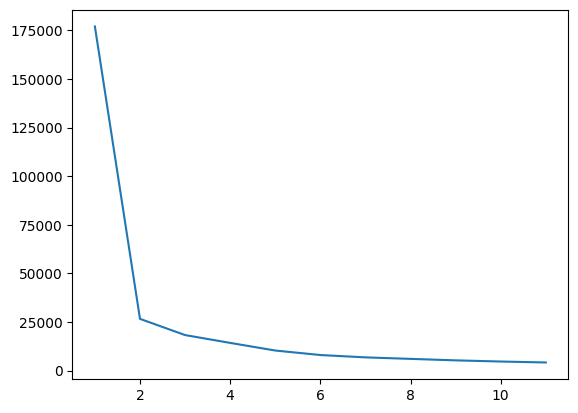

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use elbow method to find the number of clusters (From datascience.com)

wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss)

# Based on the graph 2 is the right amount of clusters

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Build and fit the cluster model

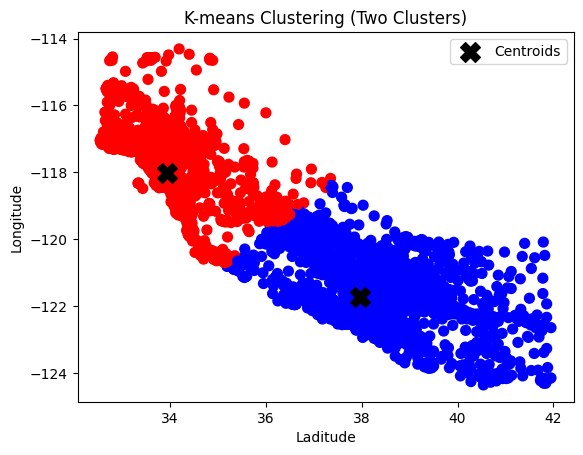

In [43]:
from sklearn.cluster import KMeans


# Define colors for the two clusters
colors = ['blue', 'red']

# Plot the data points with cluster assignments and specified colors
plt.scatter(X[:, 0], X[:, 1], c=[colors[cluster] for cluster in y_kmeans], marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('K-means Clustering (Two Clusters)')
plt.xlabel('Laditude')
plt.ylabel('Longitude')
plt.legend()

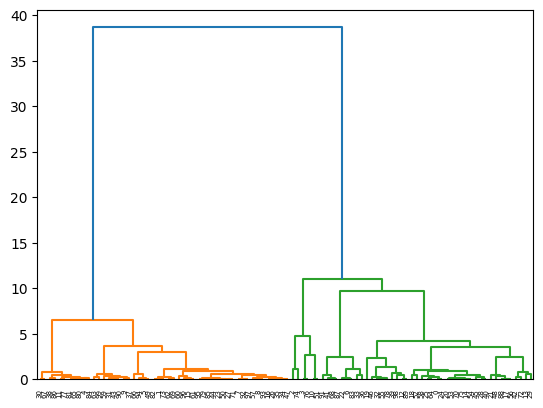

In [37]:
import scipy.cluster.hierarchy as sch
import random

holder = list(X)

# Randomly sample 100 data points

sample_size = 100
sampled_X = random.sample(holder, sample_size)

# Create the dendrogram using "ward" linkage
dendrogram = sch.dendrogram(sch.linkage(sampled_X, method='ward'))

# Based on the dendrogram 2 is still the ideal number of clusters

In [41]:
from sklearn.cluster import AgglomerativeClustering

# Using hierical clustering this time to build and fit the model

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


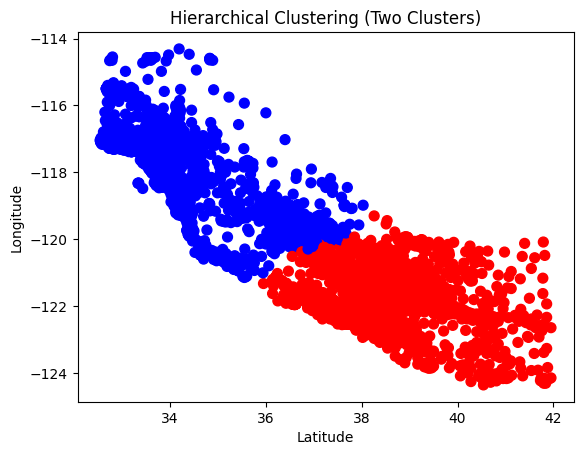

In [42]:
# Define colors for the two clusters
colors = ['blue', 'red']

# Plot the data points with cluster assignments and specified colors
plt.scatter(X[:, 0], X[:, 1], c=[colors[cluster] for cluster in y_hc], marker='o', s=50)

plt.title('Hierarchical Clustering (Two Clusters)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()


In this project, I utilized K-means and hierarchical clustering to analyze housing data based on latitude and longitude. Both methods yielded similar geographic clusters, highlighting the effectiveness of these techniques. This project marked my inaugural experience in unsupervised learning, showcasing how clustering can unveil valuable patterns in unstructured data. These insights have the potential to inform strategic decisions within the housing market's geographical dynamics.